In [21]:
# Imports
from functions import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [22]:
housing = pd.read_csv('./data/Housing.csv')
housing_columns = housing.columns
housing_arr = housing.to_numpy()

In [23]:
conditions = [housing_arr == "no", housing_arr == "yes", housing_arr == 'furnished', housing_arr == 'semi-furnished', housing_arr == 'unfurnished']
values = [0, 1, 2, 1, 0]

housing_arr = np.select(conditions, values, housing_arr).astype('int')

In [24]:
housing_arr = standardize_data(housing_arr)

In [25]:
trials = 250
results = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials),
              simulate(IterativeImputer(random_state=0), housing_arr, trials)
             ]).T
results.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

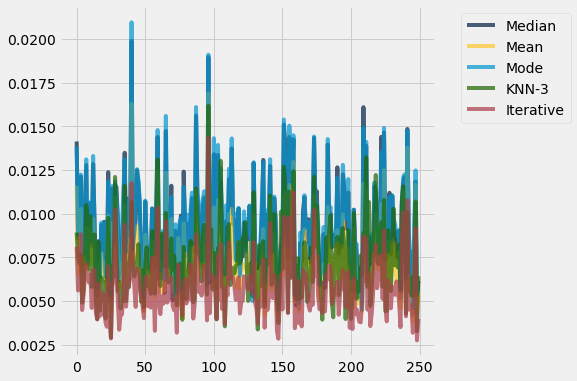

In [26]:
results_table = Table.from_df(results)
results_table.plot()

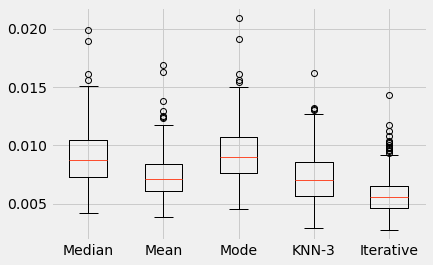

In [27]:
results_table.boxplot()

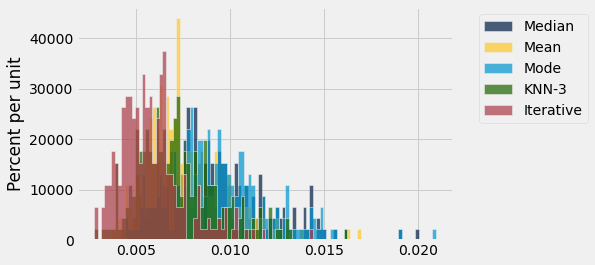

In [28]:
results_table.hist(bins=100)

In [29]:
trials = 250
results_2 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials,percent_missing=.5), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials,percent_missing=.5),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials,percent_missing=.5),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials,percent_missing=.5),
              simulate(IterativeImputer(random_state=0), housing_arr, trials,percent_missing=.5)
             ]).T
results_2.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

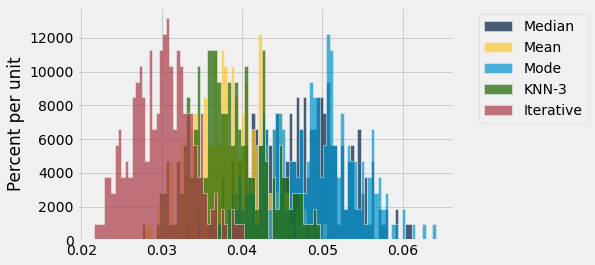

In [30]:
results_table_2 = Table.from_df(results_2)
results_table_2.hist(bins=100)

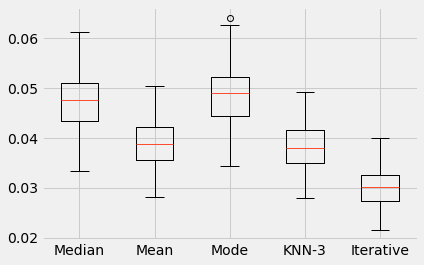

In [31]:
results_table_2.boxplot()

In [32]:
trials = 250
results_3 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials,remove_random_features_row_independent,.10), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials, remove_random_features_row_independent, .10),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials, remove_random_features_row_independent, .10),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials, remove_random_features_row_independent, .10),
              simulate(IterativeImputer(random_state=0), housing_arr, trials, remove_random_features_row_independent, .10)
             ]).T
results_3.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

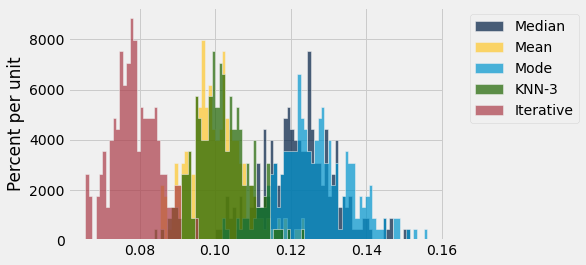

In [33]:
results_table_3 = Table.from_df(results_3)
results_table_3.hist(bins=100)

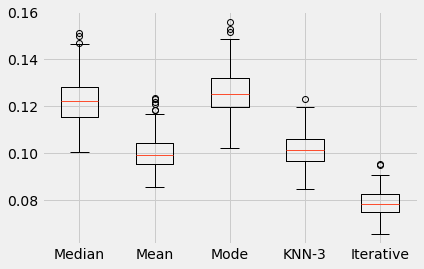

In [34]:
results_table_3.boxplot()

In [35]:
trials=250
choose_best_k = pd.DataFrame([
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=1), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=2), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=4), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=5), housing_arr, trials), 
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=6), housing_arr, trials), 
             ]).T
choose_best_k.columns = ['K=1', 'K=2', 'K=3', 'K=4', 'K=5', 'K=6']

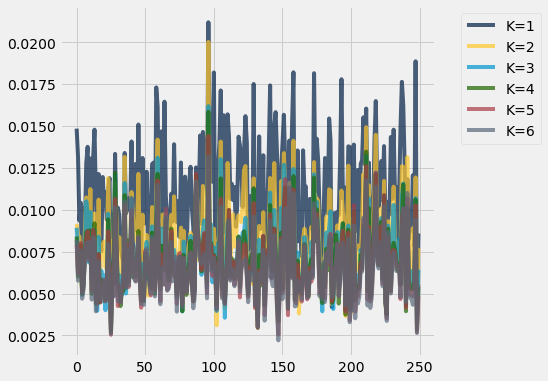

In [36]:
k_table = Table.from_df(choose_best_k)
k_table.plot()

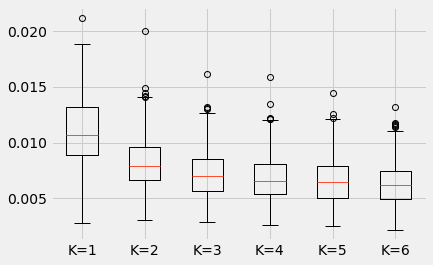

In [37]:
k_table.boxplot()

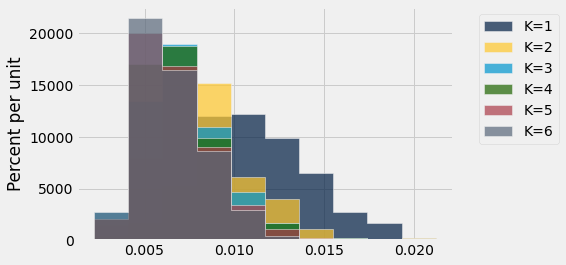

In [38]:
k_table.hist(bins=10)

In [39]:
k_table.mean()

K=1,K=2,K=3,K=4,K=5,K=6
0.0111105,0.00824359,0.00724392,0.00690206,0.00667827,0.00648153


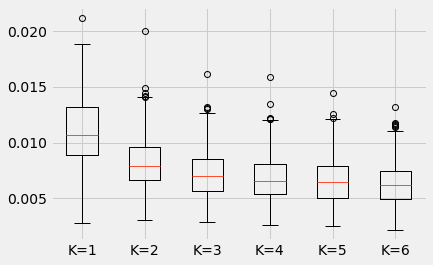

In [40]:
k_table.boxplot()